# INTRODUCTION TO DATA ANALYSIS

## *What is pandas?*

- Powerful toolkit for analyzing structured data

- Built ontop of NumPy

- Provides specialized types, methods and functions for data analysis, offering excellent support for taasks related to data analysis and mining.

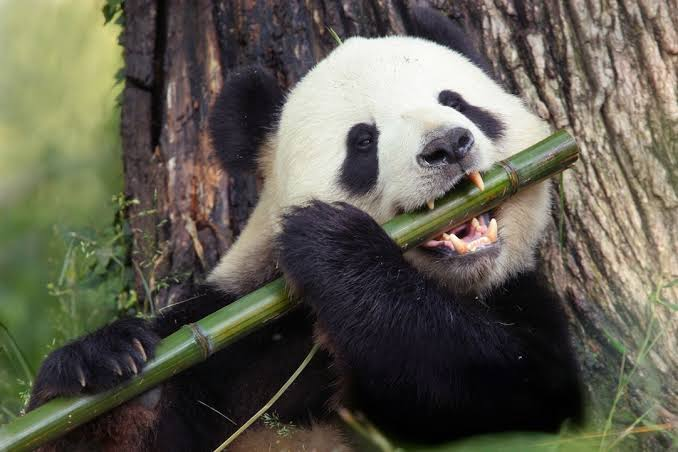
  

In [412]:
import pandas as pd

df = pd.read_csv(csv, sep=",")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True



## Why Pandas?

- **Data Cleaning and Preparation:** Functions for merging, joining, and concatenating data.
Powerful data cleaning techniques like removing duplicates, replacing values, and filtering data.

- **Data Transformation:** Reshaping and pivoting of datasets.
Label-based slicing, fancy indexing, and subsetting of large datasets.

- **Grouping and Aggregation:** Splitting data into groups based on some criteria and applying functions to each group independently (group by).

- **Efficiency:** Efficient storage and data alignment. Fast operations and computations on large datasets.

- ***Pandas does what SQL can in one line.***



In [413]:
df.to_sql('pokemon', conn, index=False, if_exists='replace')

# Which on average has the highest attack Fire , Water or Grass
sql_query = """
SELECT `Type 1`, AVG(`Attack`) as AverageAttack
FROM pokemon
WHERE `Type 1` == "Fire" OR `Type 1` == "Water" OR `Type 1` == "Grass"
GROUP BY `Type 1`;
"""

# Execute the query and fetch the results
average_attack_sql = pd.read_sql_query(sql_query, conn)
average_attack_sql



,Type 1,AverageAttack
0,Fire,84.769231
1,Grass,73.214286
2,Water,74.151786


In [414]:
# Which on average has the highest attack Fire , Water or Grass
average_attack_by_type = df.groupby('Type 1')['Attack'].mean()
average_attack_by_type[['Fire','Water','Grass']]


Type 1
Fire     84.769231
Water    74.151786
Grass    73.214286
Name: Attack, dtype: float64

# **I/O Reading & Writing Data**

## *Reading Data*

- read CSV : pandas converts comma seperated files into a dataframe.

- read JSON : pandas converts Javascript Object Notation into a dataframe.

- read excel : allows you to convert excel files (i.e xml , xls)

- read HTML : read html tables (increadibly useful if you're scraping websites in tandem with something like Beautiful Soup)

```python
import numpy as np
df.read_csv("path/to/file.csv")

```


## *Output Data*

Pandas allows exporting data to a variety of file formats, making it easy to share or store data externally. Common formats include:

- **CSV:** you can set certain parameters. For instance you can use tabs as delimiters.
- **Excel:** exports data to an Excel file, useful for compatibility with spreadsheet software.
- **JSON:** exports data to a JSON file, often used in web applications and for data interchange.
- **HTML:** exports data to an HTML table, which can be useful for web reporting.
- **SQL:** Pandas can write directly to SQL.

In [415]:
df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>#</th>\n      <th>Name</th>\n      <th>Type 1</th>\n      <th>Type 2</th>\n      <th>Total</th>\n      <th>HP</th>\n      <th>Attack</th>\n      <th>Defense</th>\n      <th>Sp. Atk</th>\n      <th>Sp. Def</th>\n      <th>Speed</th>\n      <th>Generation</th>\n      <th>Legendary</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>Bulbasaur</td>\n      <td>Grass</td>\n      <td>Poison</td>\n      <td>318</td>\n      <td>45</td>\n      <td>49</td>\n      <td>49</td>\n      <td>65</td>\n      <td>65</td>\n      <td>45</td>\n      <td>1</td>\n      <td>False</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>Ivysaur</td>\n      <td>Grass</td>\n      <td>Poison</td>\n      <td>405</td>\n      <td>60</td>\n      <td>62</td>\n      <td>63</td>\n      <td>80</td>\n      <td>80</td>\n      <td>60</td>\n      <td>1</td

# **Series**

- **Series:** A one-dimensional labeled array capable of holding any one type of data.

  - key/index:value pairs of data.

  - Data can be accessed either using the index or key.

  - Similar to Dictionary(Hashmap) but acts as an ordered dataset.  

  - Built ontop of NumPy Ndarray





In [416]:
fav_pokemon = ["Greninja","Lucario","Rayquaza"]
fav_pokemon_idx = list(df.loc[df["Name"].isin(fav_pokemon),'#'])

print(type(fav_pokemon_idx))
# note the index of the series
series1 = pd.Series(fav_pokemon)
series1


<class 'list'>


0    Greninja
1     Lucario
2    Rayquaza
dtype: object

In [417]:
# you can add an index using the index parameter
series2 = pd.Series(fav_pokemon, index=fav_pokemon_idx)
series2

# Note the ordered nature can still be accessed using index
# series2.iloc[2] == series2[658]



384    Greninja
448     Lucario
658    Rayquaza
dtype: object

In [418]:
fav_pokemon_dict = dict(zip(fav_pokemon_idx,fav_pokemon))

print(fav_pokemon_dict)
series3 = pd.Series(fav_pokemon_dict)
series3


{384: 'Greninja', 448: 'Lucario', 658: 'Rayquaza'}


384    Greninja
448     Lucario
658    Rayquaza
dtype: object

- applying a function to an entire series of data

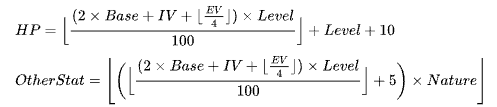

In [419]:

def hp_calc(base,IV=31,EV=252,level=100):
  return  ((2 * base + IV + (EV//4)) * level)//100 + level + 10

max_hp = df["HP"].apply(hp_calc)
max_hp

0      294
1      324
2      364
3      364
4      282
      ... 
795    304
796    304
797    364
798    364
799    364
Name: HP, Length: 800, dtype: int64

Q1. Find the lowest possible HP a pokemon can potentially have. Make a list of tuples of (min_HP , max_highest) for each pokemon.

Hints :
  - Feel free to use ```hp_calc``` or implement the equation yourself
  - Note ```IV``` and ```EV``` should both be set to ```0```
  - ```level``` REMAINS ```100```

Example Output:

The output should be a list of tuples, each representing the minimum and maximum HP of a Pokémon:

```[(min_hp_1, max_hp_1), (min_hp_2, max_hp_2), ...]```


In [420]:
min_hp = df["HP"].apply(lambda x : hp_calc(base = x,IV=0,EV=0,level=100)) # note the use of a lambda function/ annoynmous functions
# min_hp = df["HP"].apply(lambda x : ((2 * x) * 100)//100 + 100 + 10)
print(list(zip(min_hp,max_hp)))

[(200, 294), (230, 324), (270, 364), (270, 364), (188, 282), (226, 320), (266, 360), (266, 360), (266, 360), (198, 292), (228, 322), (268, 362), (268, 362), (200, 294), (210, 304), (230, 324), (190, 284), (200, 294), (240, 334), (240, 334), (190, 284), (236, 330), (276, 370), (276, 370), (170, 264), (220, 314), (190, 284), (240, 334), (180, 274), (230, 324), (180, 274), (230, 324), (210, 304), (260, 354), (220, 314), (250, 344), (290, 384), (202, 296), (232, 326), (272, 366), (250, 344), (300, 394), (186, 280), (256, 350), (340, 434), (390, 484), (190, 284), (260, 354), (200, 294), (230, 324), (260, 354), (180, 274), (230, 324), (230, 324), (250, 344), (130, 224), (180, 274), (190, 284), (240, 334), (210, 304), (270, 364), (190, 284), (240, 334), (220, 314), (290, 384), (190, 284), (240, 334), (290, 384), (160, 254), (190, 284), (220, 314), (220, 314), (250, 344), (270, 364), (290, 384), (210, 304), (240, 334), (270, 364), (190, 284), (270, 364), (190, 284), (220, 314), (270, 364), (21

### Pandas Data Types
Pandas has its own set of data types, but it often uses NumPy's data types under the hood. The main Pandas data types are:

- object: For text or mixed numeric and non-numeric values.
- int64, float64, bool: Similar to NumPy's types but with some additional features like handling of missing data.
- datetime64[ns]: For date and time values.
timedelta[ns]: For differences in times.
- category: For categorical data, which can be more memory-efficient than object type for string data with a small number of unique values.
- Int64, Float64, Bool (capitalized): These are Pandas' own versions of integer, float, and boolean types that can handle missing values (NaN), unlike their NumPy counterparts.
Correlation Between Pandas and NumPy Types


In [421]:
fav_pokemon_ndarray = np.array(series3)
fav_pokemon_ndarray

array(['Greninja', 'Lucario', 'Rayquaza'], dtype=object)

In [422]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [423]:
df.select_dtypes('int')

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,318,45,49,49,65,65,45,1
1,2,405,60,62,63,80,80,60,1
2,3,525,80,82,83,100,100,80,1
3,3,625,80,100,123,122,120,80,1
4,4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6
796,719,700,50,160,110,160,110,110,6
797,720,600,80,110,60,150,130,70,6
798,720,680,80,160,60,170,130,80,6


# **Dataframe**

- **DataFrame:** A two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). It's like a spreadsheet or SQL table.

  - Each column in a Dataframe is effectively a Series

In [424]:
import pandas as pd # pd is easier to write than pandas
import numpy as np

data = {
    'index' : fav_pokemon_dict.keys(),
    'name' : fav_pokemon_dict.values()
}

df_example = pd.DataFrame(data)
df_example = df_example.set_index("index")
df_example.head()

,name
index,
384,Greninja
448,Lucario
658,Rayquaza


In [425]:
print(type(df_example["name"]))


<class 'pandas.core.series.Series'>


## *Viewing and Understanding Dataframes*


- **Head:** prints out the first 5 records

In [426]:
## display all rows
pd.set_option('display.max_columns', 20) # can be set to None
pd.set_option('display.max_rows', 20)
df.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


- **Tail:** prints out the last 5 records

In [427]:
# tails prints out the last 5
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


- **sample:** prints out a random sample of rows/records

In [428]:
df.sample(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
234,216,Teddiursa,Normal,NaN,330,60,80,50,50,50,40,2,False
246,228,Houndour,Dark,Fire,330,45,60,30,80,50,65,2,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
110,102,Exeggcute,Grass,Psychic,325,60,40,80,60,45,40,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False


- **columns:** lists all of the columns

In [429]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

- **summary:** gives a summary of the data

In [430]:
df.info()
#df.info(verbose=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


- **describe:** gives a run down of some basic statistics

In [431]:
df.describe()
# df.iloc[df["HP"].idxmax()] # which pokemon has the highest base HP stat

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


- **shape:** returns a tuple with the number of columns against the number of rows.

In [432]:
df.shape , len(df)

((800, 13), 800)

- **Is Null:** shows the number of NaN/Null data for each column

In [433]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

- *Number of Unique:* returns the number data

In [434]:
df.nunique()

#             721
Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

- **Sorting of Columns:** Allows you to sort Data

In [435]:
df.sort_values(by="Total",ascending=False)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
288,265,Wurmple,Bug,NaN,195,45,45,35,20,30,20,3,False
446,401,Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,False
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False


## **Setting Index**

- pd.set_index("column_name") would use the given column as the new index

- This is assuming that df["column_name"] is unique.

In [436]:
df = df.set_index("Name")

# **Selecting and Extracting Data**


- **Accessing Columns:** You can use square brackets to access any column. Additionally you can also slice columns or send in a list of column names.

In [437]:
# pd.set_option('display.max_rows', None)
df["Attack"]

Name
Bulbasaur                 49
Ivysaur                   62
Venusaur                  82
VenusaurMega Venusaur    100
Charmander                52
                        ... 
Diancie                  100
DiancieMega Diancie      160
HoopaHoopa Confined      110
HoopaHoopa Unbound       160
Volcanion                110
Name: Attack, Length: 800, dtype: int64

- **Accessing List of Columns:** Additionally you can also slice columns or send in a list of column names.

In [438]:
df[['Attack','Defense','HP']]

,Attack,Defense,HP
Name,,,
Bulbasaur,49,49,45
Ivysaur,62,63,60
Venusaur,82,83,80
VenusaurMega Venusaur,100,123,80
Charmander,52,43,39
...,...,...,...
Diancie,100,150,50
DiancieMega Diancie,160,110,50
HoopaHoopa Confined,110,60,80


In [439]:
df[df.columns[6:]]

,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,
Bulbasaur,49,65,65,45,1,False
Ivysaur,63,80,80,60,1,False
Venusaur,83,100,100,80,1,False
VenusaurMega Venusaur,123,122,120,80,1,False
Charmander,43,60,50,65,1,False
...,...,...,...,...,...,...
Diancie,150,100,150,50,6,True
DiancieMega Diancie,110,160,110,110,6,True
HoopaHoopa Confined,60,150,130,70,6,True


- **Conditional Slicing:**

In [440]:
df[df["Attack"] > 50]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


Q2. Extract Special Attack and Defense Stats from Pokémon Dataset

- Objective:
  - Create a new DataFrame from an existing Pokémon dataset, containing only the columns for Special Attack (Sp. Atk) and Special Defense (Sp. Def).

- Expected Output:
  - special_stats_df should be a DataFrame containing only the Sp. Atk and Sp. Def columns.


In [441]:
special_stats_df = df[[c for c in df.columns if "Sp." in c]] # special stats only
# df[["Name","HP"]]

- **Accessing Rows:** You can use square brackets to access any rows. Additionally you can also slice.

In [442]:
df[df["#"] == 420]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Cherubi,420,Grass,NaN,275,45,35,45,62,53,35,4,False


## *Loc and ILoc Function*

- Finds the location of a certain record using either index or label for iloc and loc respectivel.


In [443]:
df.loc["Pikachu"] # uses a hashable label

#                   25
Type 1        Electric
Type 2             NaN
Total              320
HP                  35
Attack              55
Defense             40
Sp. Atk             50
Sp. Def             50
Speed               90
Generation           1
Legendary        False
Name: Pikachu, dtype: object

In [444]:
df.iloc[30]# uses the index

#                   25
Type 1        Electric
Type 2             NaN
Total              320
HP                  35
Attack              55
Defense             40
Sp. Atk             50
Sp. Def             50
Speed               90
Generation           1
Legendary        False
Name: Pikachu, dtype: object

- you can feed it a list of indexes or labels same as before


In [445]:
eeveelutions = ["Sylveon", "Umbreon", "Espeon", "Vaporeon", "Jolteon", "Flareon", "Leafeon", "Glaceon"]

df.loc[eeveelutions]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Sylveon,700,Fairy,NaN,525,95,65,65,110,130,60,6,False
Umbreon,197,Dark,NaN,525,95,65,110,60,130,65,2,False
Espeon,196,Psychic,NaN,525,65,65,60,130,95,110,2,False
Vaporeon,134,Water,NaN,525,130,65,60,110,95,65,1,False
Jolteon,135,Electric,NaN,525,65,65,60,110,95,130,1,False
Flareon,136,Fire,NaN,525,65,130,60,95,110,65,1,False
Leafeon,470,Grass,NaN,525,65,110,130,60,65,95,4,False
Glaceon,471,Ice,NaN,525,65,60,110,130,95,65,4,False


In [446]:
eeveelutions_indices = [df.index.get_loc(name) for name in ["Sylveon", "Umbreon", "Espeon", "Vaporeon", "Jolteon", "Flareon", "Leafeon", "Glaceon"]]
print(eeveelutions_indices)
df.iloc[eeveelutions_indices]

[770, 212, 211, 145, 146, 147, 521, 522]


,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Sylveon,700,Fairy,NaN,525,95,65,65,110,130,60,6,False
Umbreon,197,Dark,NaN,525,95,65,110,60,130,65,2,False
Espeon,196,Psychic,NaN,525,65,65,60,130,95,110,2,False
Vaporeon,134,Water,NaN,525,130,65,60,110,95,65,1,False
Jolteon,135,Electric,NaN,525,65,65,60,110,95,130,1,False
Flareon,136,Fire,NaN,525,65,130,60,95,110,65,1,False
Leafeon,470,Grass,NaN,525,65,110,130,60,65,95,4,False
Glaceon,471,Ice,NaN,525,65,60,110,130,95,65,4,False


- loc allows you to slice as well

In [447]:
df.loc["Vaporeon": "Sylveon":2,["HP","Attack"]]

,HP,Attack
Name,,
Vaporeon,130,65
Flareon,65,130
Omanyte,35,40
Kabuto,30,80
Aerodactyl,80,105
...,...,...
Dragalge,65,75
Clawitzer,71,73
Heliolisk,62,55


- **Slicing Columns:** loc and iloc also provides the means to slice columns

In [448]:
df.loc[:,"Attack":]

,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,
Bulbasaur,49,49,65,65,45,1,False
Ivysaur,62,63,80,80,60,1,False
Venusaur,82,83,100,100,80,1,False
VenusaurMega Venusaur,100,123,122,120,80,1,False
Charmander,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...
Diancie,100,150,100,150,50,6,True
DiancieMega Diancie,160,110,160,110,110,6,True
HoopaHoopa Confined,110,60,150,130,70,6,True


In [449]:
df.iloc[:,5:]

,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,
Bulbasaur,49,49,65,65,45,1,False
Ivysaur,62,63,80,80,60,1,False
Venusaur,82,83,100,100,80,1,False
VenusaurMega Venusaur,100,123,122,120,80,1,False
Charmander,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...
Diancie,100,150,100,150,50,6,True
DiancieMega Diancie,160,110,160,110,110,6,True
HoopaHoopa Confined,110,60,150,130,70,6,True


- **Conditional Slicing** : you can send a boolean mask through loc.

In [450]:
df.loc[df["Attack"] > 50]

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


## **Subsetting & Appending to a DataFrame**

- **Subsetting Data:** Subsetting data means selecting specific rows and columns from a DataFrame based on certain conditions or criteria.

In [451]:
powerful_pokemon = df.loc[df["Total"] > 450]
powerful_pokemon

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [452]:
powerful_pokemon = df.query("Total > 450")
powerful_pokemon

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


- **Appending New Column:** Adding new columns means introducing new data fields to the DataFrame.

In [468]:
gen_to_region = {
    1: "Kanto",
    2: "Johto",
    3: "Hoenn",
    4: "Sinnoh",
    5: "Unova",
    6: "Kalos",
    7: "Alola",
    8: "Galar"
}

df["Region"] = df["Generation"].apply(lambda x: gen_to_region[x])
df.sample(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Region
Name,,,,,,,,,,,,
Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False,Kanto
Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,Sinnoh
Turtwig,Grass,Grass,318,55,68,64,45,55,31,4,False,Sinnoh
Shellos,Water,Water,325,76,48,48,57,62,34,4,False,Sinnoh
Porygon-Z,Normal,Normal,535,85,80,70,135,75,90,4,False,Sinnoh
KeldeoOrdinary Forme,Water,Fighting,580,91,72,90,129,90,108,5,False,Unova
Palpitoad,Water,Ground,384,75,65,55,65,55,69,5,False,Unova
Azelf,Psychic,Psychic,580,75,125,70,125,70,115,4,True,Sinnoh
Cubone,Ground,Ground,320,50,50,95,40,50,35,1,False,Kanto


- **Dropping Columns:** Dropping columns means removing specific columns from the DataFrame.

In [454]:
df = df.drop('Region', axis=1)
df.sample(10)

# df = df[df.columns[:-1]]
# df.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Lillipup,506,Normal,NaN,275,45,60,45,25,45,55,5,False
Goldeen,118,Water,NaN,320,45,67,60,35,50,63,1,False
Kangaskhan,115,Normal,NaN,490,105,95,80,40,80,90,1,False
Florges,671,Fairy,NaN,552,78,65,68,112,154,75,6,False
Jumpluff,189,Grass,Flying,460,75,55,70,55,95,110,2,False
Hitmontop,237,Fighting,NaN,455,50,95,95,35,110,70,2,False
Stoutland,508,Normal,NaN,500,85,110,90,45,90,80,5,False
Infernape,392,Fire,Fighting,534,76,104,71,104,71,108,4,False
Chimchar,390,Fire,NaN,309,44,58,44,58,44,61,4,False


- **Adding Row:** Dropping columns means removing specific columns from the DataFrame.

In [455]:
corviknight = {
    'Name' : 'Corviknight',
    '#' : 823,
    'Type 1': 'Flying',
    'Type 2': 'Steel',
    'HP': 98,
    'Attack': 87,
    'Defense': 105,
    'Sp. Atk': 53,
    'Sp. Def': 85,
    'Speed': 67,
    'Total': 495,
    'Generation': 8,
    'Legendary': False
}

# You can add this record to your DataFrame using:
# df = df.append(pd.DataFrame(corviknight,index=[0]).set_index('Name'))
# pd.concat([df.loc[:],pd.DataFrame(corviknight,index=[0]).set_index('Name')])
df.loc["Corviknight"] = {
    '#' : 823,
    'Type 1': 'Flying',
    'Type 2': 'Steel',
    'HP': 98,
    'Attack': 87,
    'Defense': 105,
    'Sp. Atk': 53,
    'Sp. Def': 85,
    'Speed': 67,
    'Total': 495,
    'Generation': 8,
    'Legendary': False
}
df.tail()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True
HoopaHoopa Unbound,720,Psychic,Dark,680,80,160,60,170,130,80,6,True
Volcanion,721,Fire,Water,600,80,110,120,130,90,70,6,True
Corviknight,823,Flying,Steel,495,98,87,105,53,85,67,8,False


- **Removing a row Row:** Removing

- **Dropping Row:** Dropping columns means removing specific columns from the DataFrame.

In [456]:
df = df[df.index != 'Corviknight']
df.tail()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
DiancieMega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
HoopaHoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True
HoopaHoopa Unbound,720,Psychic,Dark,680,80,160,60,170,130,80,6,True
Volcanion,721,Fire,Water,600,80,110,120,130,90,70,6,True


# **Aggregation using .groupby() in pandas**

pandas lets you aggregate values by grouping them by specific column values. You can do that by combining the .groupby() method with a summary method of your choice. The below code displays the mean of each of the numeric columns grouped by Outcome.


In [457]:
df.groupby('Type 1').mean()

<ipython-input-457-593fb63c81d3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Type 1').mean()


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,363.851852,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


In [458]:
df.groupby(['Type 1', 'Type 2']).mean()

#       Total         HP      Attack     Defense  \
Type 1 Type 2                                                                
Bug    Electric  595.500000  395.500000  60.000000   62.000000   55.000000   
       Fighting  214.000000  550.000000  80.000000  155.000000   95.000000   
       Fire      636.500000  455.000000  70.000000   72.500000   60.000000   
       Flying    286.285714  419.500000  63.000000   70.142857   61.571429   
       Ghost     292.000000  236.000000   1.000000   90.000000   45.000000   
...                     ...         ...        ...         ...         ...   
Water  Ice       103.000000  511.666667  90.000000   83.333333  113.333333   
       Poison    118.666667  426.666667  61.666667   68.333333   58.333333   
       Psychic   111.800000  481.000000  87.000000   73.000000  104.000000   
       Rock      430.000000  428.750000  70.750000   82.750000  112.750000   
       Steel     395.000000  530.000000  84.000000   86.000000   88.000000   

                    Sp. Atk     Sp. Def      Speed  Generation  Legendary  
Type 1 Type 2                                                              
Bug    Electric   77.000000   55.000000  86.500000    5.000000        0.0  
       Fighting   40.000000  100.000000  80.000000    2.000000        0.0  
       Fire       92.500000   80.000000  80.000000    5.000000        0.0  
       Flying     72.857143   69.071429  82.857143    2.857143        0.0  
       Ghost      30.000000   30.000000  40.000000    3.000000        0.0  
...                     ...         ...        ...         ...        ...  
Water  Ice        80.000000   78.333333  66.666667    1.000000        0.0  
       Poison     61.666667   91.666667  85.000000    1.333333        0.0  
       Psychic    94.000000   79.000000  44.000000    1.200000        0.0  
       Rock       61.500000   65.000000  36.000000    3.750000        0.0  
       Steel     111.000000  101.000000  60.000000    4.000000        0.0  

[136 rows x 10 columns]

## Cleaning Data

- Changing the Naming of Mega Pokemon


In [459]:
## The index of Mega Pokemons contained extra and unneeded text. Removed all the text before "Mega"
df.index = df.index.str.replace(".*(?=Mega)", "")
df.head(10)

<ipython-input-459-6b24d8d4f765>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.index = df.index.str.replace(".*(?=Mega)", "")


,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False



- Dealing with Null data in Type2

In [460]:
#some values in TYPE2 are empty and thus they have to be filled or deleted
df['Type 2'].fillna(df['Type 1'], inplace=True) #fill NaN values in Type2 with corresponding values of Type
df.head(10)

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,Fire,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


- Removing the original entry number.

In [461]:
df = df.drop("#",axis=1)

- subset of Non Mega Pokemon / Non Primal

In [462]:
df_filtered = df.loc[~df.index.str.contains('Mega','Primal')]

Q3. Identify Pokémon with the Highest Individual Stats

- Objective:
  - Determine which Pokémon has the highest value in each individual stat in a given Pokémon dataset.

- Expected Output:
  - highest_stats should be a dictionary with keys like "Max HP", "Max Attack", etc., and their corresponding Pokémon names as values.

In [463]:
highest_stats = {"Max " + name: df[name].idxmax() for name in df.columns[2:-2]}
highest_stats

{'Max Total': 'Mega Mewtwo X',
 'Max HP': 'Blissey',
 'Max Attack': 'Mega Mewtwo X',
 'Max Defense': 'Mega Steelix',
 'Max Sp. Atk': 'Mega Mewtwo Y',
 'Max Sp. Def': 'Shuckle',
 'Max Speed': 'DeoxysSpeed Forme'}

## Correlation between the attributes ?

<ipython-input-464-fe67b9012f6d>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap


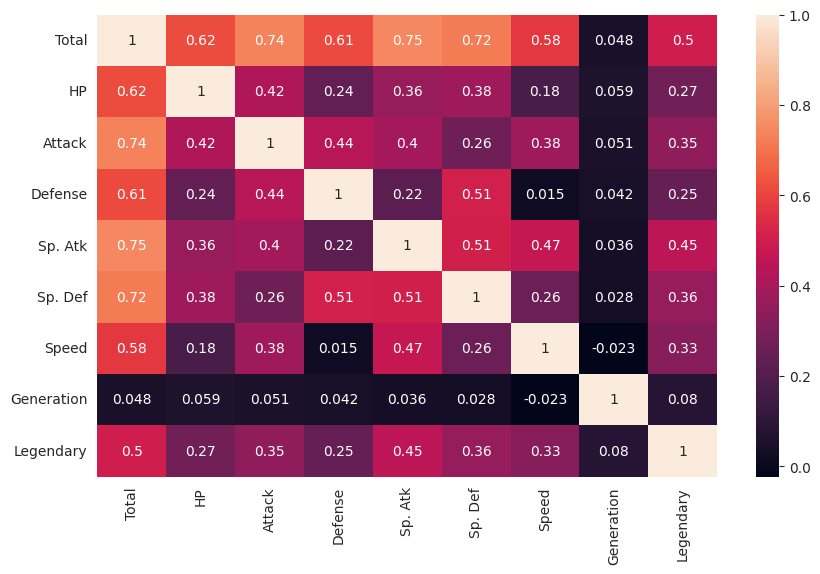

In [464]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

plt.figure(figsize=(10,6)) #manage the size of the plot
sns.heatmap(df.corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

## What is the distribution of Pokemon Types?

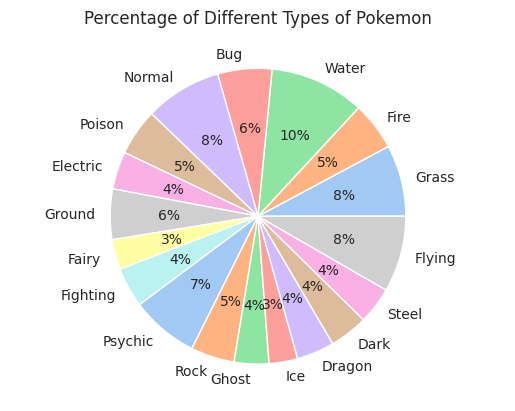

In [465]:
types = df['Type 1'].unique()
counts = [len(df.query('`Type 1` == @typ or `Type 2` == @typ')) for typ in types ]

colors = sns.color_palette('pastel')

plt.axis('equal')
plt.title("Percentage of Different Types of Pokemon")
plt.pie(counts, labels = types, colors = colors, autopct='%.0f%%')
plt.show()

## Attack by Type

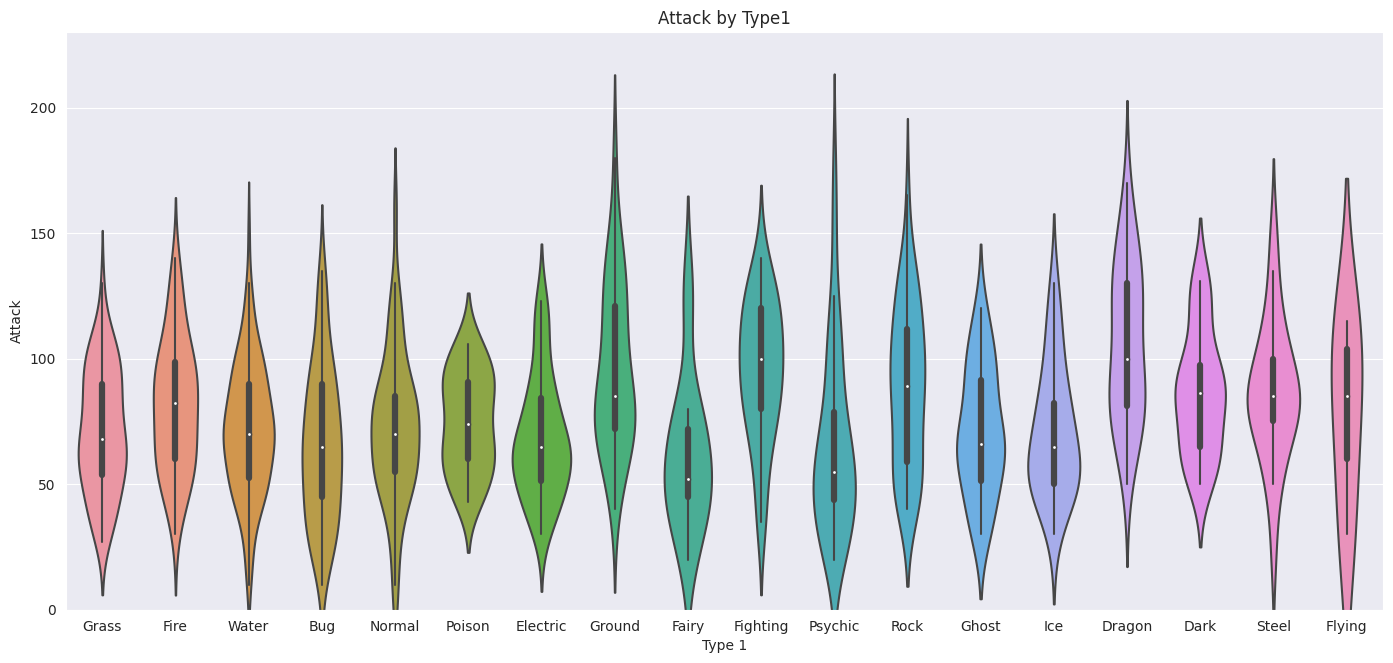

In [466]:
plt.subplots(figsize = (17,7.5))
plt.title('Attack by Type1')
sns.violinplot(x = "Type 1", y = "Attack",data = df_filtered)
plt.ylim(0,230)
plt.show()

# Strongest Region of Pokemon



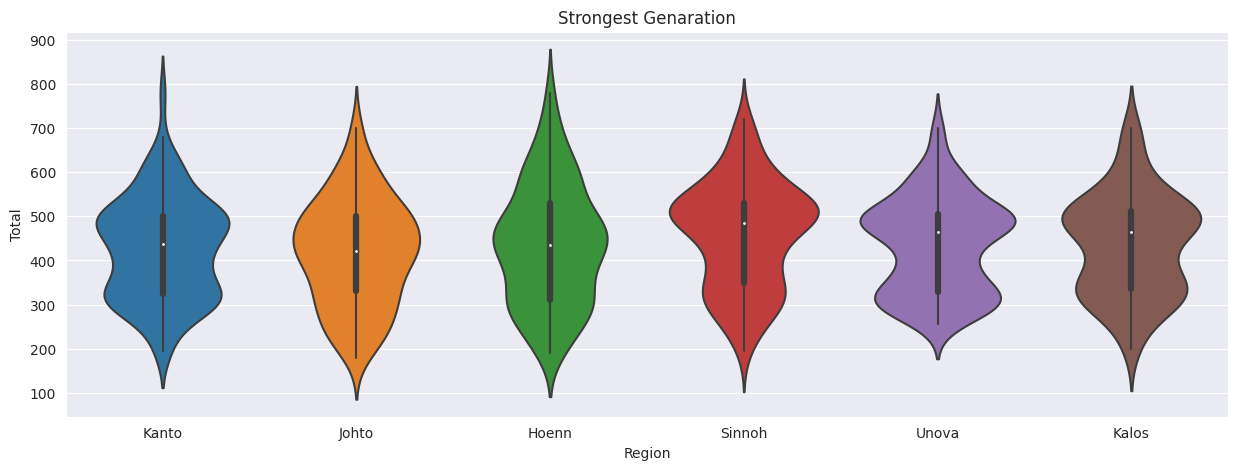

In [469]:
plt.subplots(figsize = (15,5))
plt.title('Strongest Genaration')
sns.violinplot(x = "Region", y = "Total",data = df)
plt.show()